<a href="https://colab.research.google.com/github/pablopsz/data_science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Edinburgh, Scotland, United Kingdom*

Todos nós já conhecemos o [Airbnb](https://www.airbnb.com.br/), a **maior empresa de hospedagem da atualidade**. Mas como é possível atingir esse nível **sem possuir nenhum hotel**?

Juntando o útil ao agradável, o Airbnb conecta pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis. Para isso, o Airbnb fornece uma plataforma que garente praticidade para ambas as partes.

Em 2022, a empresa fundada em 2007 alcançou a marca de **mais de 4 milhões de anfitriões** que já receberam **mais de 1 bilhão de hóspedes** em quase todos os países.

Um ponto a se destacar sobre o Airbnb é o compartilhamento de amplos conjuntos de dados através do do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Essa prática possibilita o acesso a informações referentes a diversas cidades ao redor do mundo, assim sendo possível o desenvolvimento de projetos e soluções em Data Science.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Edinburgh, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados



In [ ]:
# importar os pacotes necessarios
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/pablopsz/datasets/main/listings.csv')

# importar o arquivo gpd que utilizaremos mais tarde
geo = gpd.read_file('https://raw.githubusercontent.com/pablopsz/datasets/main/neighbourhoods.geojson')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - 	número de reviews que a propriedade possui (nos últimos 12 meses)
* `license` - número da licensa do proprietário

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras e últimas entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15420,Rental unit in Edinburgh · ★4.97 · 1 bedroom ·...,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.957590,-3.188050,Entire home/apt,130,3,511,2023-09-03,3.32,1,16,79,NaN
1,24288,Loft in Edinburgh · ★4.62 · 2 bedrooms · 2 bed...,46498,Gordon,NaN,"Canongate, Southside and Dumbiedykes",55.944983,-3.185293,Entire home/apt,91,3,286,2023-07-24,1.81,1,42,55,NaN
2,48645,Condo in Edinburgh · ★4.86 · 1 bedroom · 2 bed...,221474,Mark,NaN,"Canongate, Southside and Dumbiedykes",55.950720,-3.183050,Private room,129,2,979,2023-09-08,6.37,1,69,68,NaN
3,51505,Rental unit in Edinburgh · ★4.76 · 2 bedrooms ...,236828,Francois,NaN,New Town West,55.954800,-3.196410,Entire home/apt,170,4,51,2023-08-23,0.33,14,2,32,NaN
4,54188,Boat in Edinburgh · ★4.61 · 3 bedrooms · 2 bed...,253850,Natalie,NaN,Dalry and Fountainbridge,55.942170,-3.208630,Entire home/apt,225,1,43,2022-07-03,0.32,3,175,0,NaN


In [ ]:
# mostrar as 5 últimas entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
8039,974513574116367354,Rental unit in Leith · ★New · 1 bedroom · 2 be...,131677538,Conor,NaN,Western Harbour and Leith Docks,55.986759,-3.188275,Private room,60,2,0,NaN,NaN,1,255,0,NaN
8040,974540296775384595,Rental unit in Edinburgh · ★New · 4 bedrooms ·...,146730114,Adam,NaN,Newington and Dalkeith Road,55.939714,-3.177628,Entire home/apt,399,2,0,NaN,NaN,9,258,0,NaN
8041,975083364733576599,Rental unit in Edinburgh · ★New · 3 bedrooms ·...,238856343,Hany,NaN,Hillside and Calton Hill,55.959688,-3.176968,Entire home/apt,268,2,0,NaN,NaN,20,134,0,NaN
8042,976567080851790966,Rental unit in Edinburgh · ★New · 1 bedroom · ...,18970049,Darcy,NaN,Moredun and Craigour,55.917985,-3.140077,Private room,56,1,0,NaN,NaN,2,207,0,NaN
8043,977248060255868689,Rental unit in Edinburgh · ★New · 2 bedrooms ·...,284574597,Luka,NaN,Drylaw,55.966904,-3.244546,Entire home/apt,107,1,0,NaN,NaN,3,0,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Dando sequência à análise, vamos conferir a quantidade de variáveis e a quantidade de entradas que possuímos em nosso dataset. Além disso, vamos verificar o tipo de cada coluna.

In [ ]:
# identificar o volume de dados do DataFrame
print(f'Número de variáveis: {df.shape[1]}')
print(f'Número de entradas: {df.shape[0]}\n')

# verificar a tipagem de cada coluna
df.dtypes

Número de variáveis: 18
Número de entradas: 8044



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Agora que conhecemos o corpo do nossos dados, vamos conferir o conteúdo. Sabemos que temos 8044 entradas em nosso dataset, mas precisamos conferir a pureza desses dados. Vamos analisar a porcentagem dessas entradas que estão ausentes em cada variável.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df.isnull().sum().sort_values(ascending=False)/df.shape[0]

neighbourhood_group               1.000000
license                           0.987444
reviews_per_month                 0.080930
last_review                       0.080930
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Podemos entender o seguinte:

* A coluna `'neighbourhood_group'` possui valores apenas nulos.
* A coluna `'license'` possui quase que inteiramente valores nulos.
* As colunas `'reviews_per_month'` e `'last_review'` possuem exatamente a mesma quantidade de valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?**

Vamos analisar agora a distribuição dos valores dessas variáveis. Para isso, vamos plotar um histograma para as variáveis numéricas.

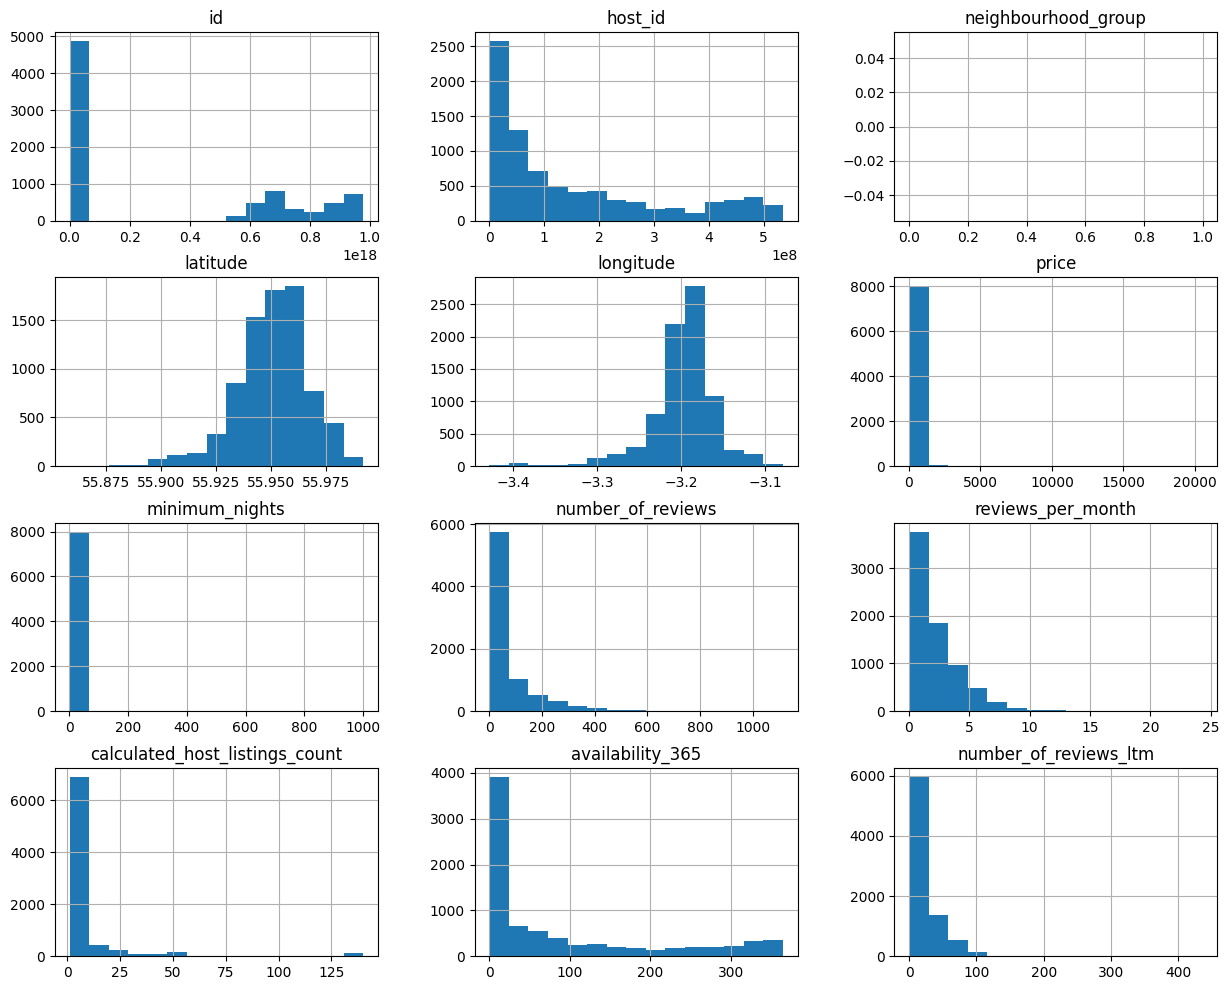

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=(15,12), bins=15);

### **Q4. Há *outliers* presentes?**

Analisando a distribuição dos valores pelo histograma, podemos enxergar indícios de outliers em nossas variáveis. Nessa análise vamos focar nas variáveis 'price' e 'minimum nights'.

Mas qual o problema desses outliers? Eles acabam distorcendo completamente a distribuição e as métricas de nossas variáveis. Para confirmar sua presença podemos utilizar dois métodos:


* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico
df.describe().round(1)

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.044000e+03,8044.0,0.0,8044.0,8044.0,8044.0,8044.0,8044.0,7393.0,8044.0,8044.0,8044.0
mean,3.058601e+17,147270807.6,NaN,56.0,-3.2,195.8,4.3,71.7,2.2,7.5,88.6,20.0
std,3.862769e+17,156311703.2,NaN,0.0,0.0,513.9,28.4,110.3,2.1,20.1,115.5,25.0
min,1.542000e+04,2784.0,NaN,55.9,-3.4,8.0,1.0,0.0,0.0,1.0,0.0,0.0
25%,2.163270e+07,22597535.0,NaN,55.9,-3.2,85.0,1.0,6.0,0.6,1.0,0.0,2.0
50%,4.533967e+07,79362697.0,NaN,56.0,-3.2,137.0,2.0,26.0,1.6,1.0,28.0,10.0
75%,6.851844e+17,232393220.5,NaN,56.0,-3.2,200.0,3.0,89.0,3.2,4.0,145.0,30.2
max,9.772481e+17,534793492.0,NaN,56.0,-3.1,20551.0,1000.0,1114.0,24.3,140.0,365.0,436.0


Analisando as informações acima, algumas teorias acabam se confirmando:

* Temos 75% da coluna `'price'` abaixo de 200 porém a média é 195.8 e o valor máximo é de 20551.0.
* O valor máximo de `'minimum_nights'` é o equivalente a mais de 2 anos e meio.

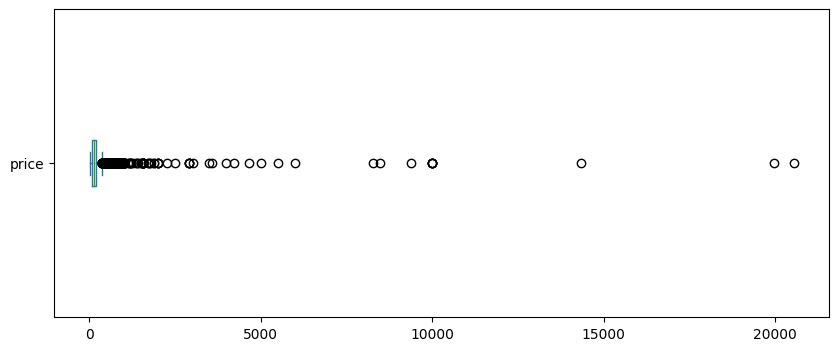

In [ ]:
# boxplot para 'price'

df.price.plot(kind='box', vert=False, figsize=(10,4));

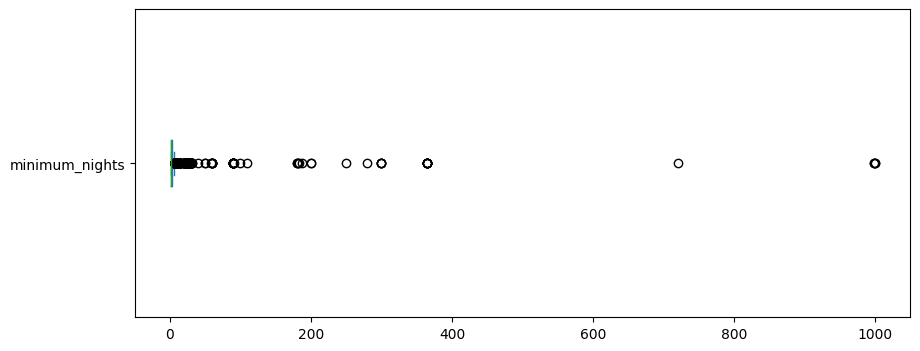

In [ ]:
# boxplot para 'minimum_nights'

df.minimum_nights.plot(kind='box', vert=False, figsize=(10,4));

#### Tratando dados

Agora que já identificamos que possuímos colunas praticamente sem valores e que possuímos outliers em nossas variáveis de interesse, vamos começar a limpar esses dados.


In [ ]:
# realizando a cópia do df
df_clean = df.copy()

# retirando as colunas
df_clean.drop(['neighbourhood_group', 'license'], axis=1, inplace=True);

Agora que retiramos as colunas que não possuiam valores, vamos tratas os outliers da variável 'price'.

In [ ]:
# identificando os outliers para a variável price
q1_price = df_clean.price.quantile(.25)
q3_price = df_clean.price.quantile(.75)
IQR_price = q3_price - q1_price

# definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print(f'Limite superior de price: {sup_price}')
print(f'Entradas acima do limite: {len(df_clean[df_clean.price > sup_price])}')
print(f'Limite inferior de price: {inf_price}')
print(f'Entradas abaixo do limite: {len(df_clean[df_clean.price < inf_price])}')

# limpando os dados
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)

Limite superior de price: 372.5
Entradas acima do limite: 518
Limite inferior de price: -87.5
Entradas abaixo do limite: 0


Vamos repitir o processo para a coluna 'minimum_nights'.

In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df_clean.minimum_nights.quantile(.25)
q3_minimum_nights = df_clean.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights

# definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print(f'Limite superior de minimum_nights: {sup_minimum_nights}')
print(f'Entradas acima do limite: {len(df_clean[df_clean.minimum_nights > sup_minimum_nights])}')
print(f'Limite inferior de minimum_nights: {inf_minimum_nights}')
print(f'Entradas abaixo do limite: {len(df_clean[df_clean.minimum_nights < inf_minimum_nights])}')

# limpando os dados
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)

Limite superior de minimum_nights: 6.0
Entradas acima do limite: 413
Limite inferior de minimum_nights: -2.0
Entradas abaixo do limite: 0


Já que limpamos nossos dados, vamos conferir nosso shape e vamos plotar um novo hist.

Número de variáveis: 16
Número de entradas: 7113


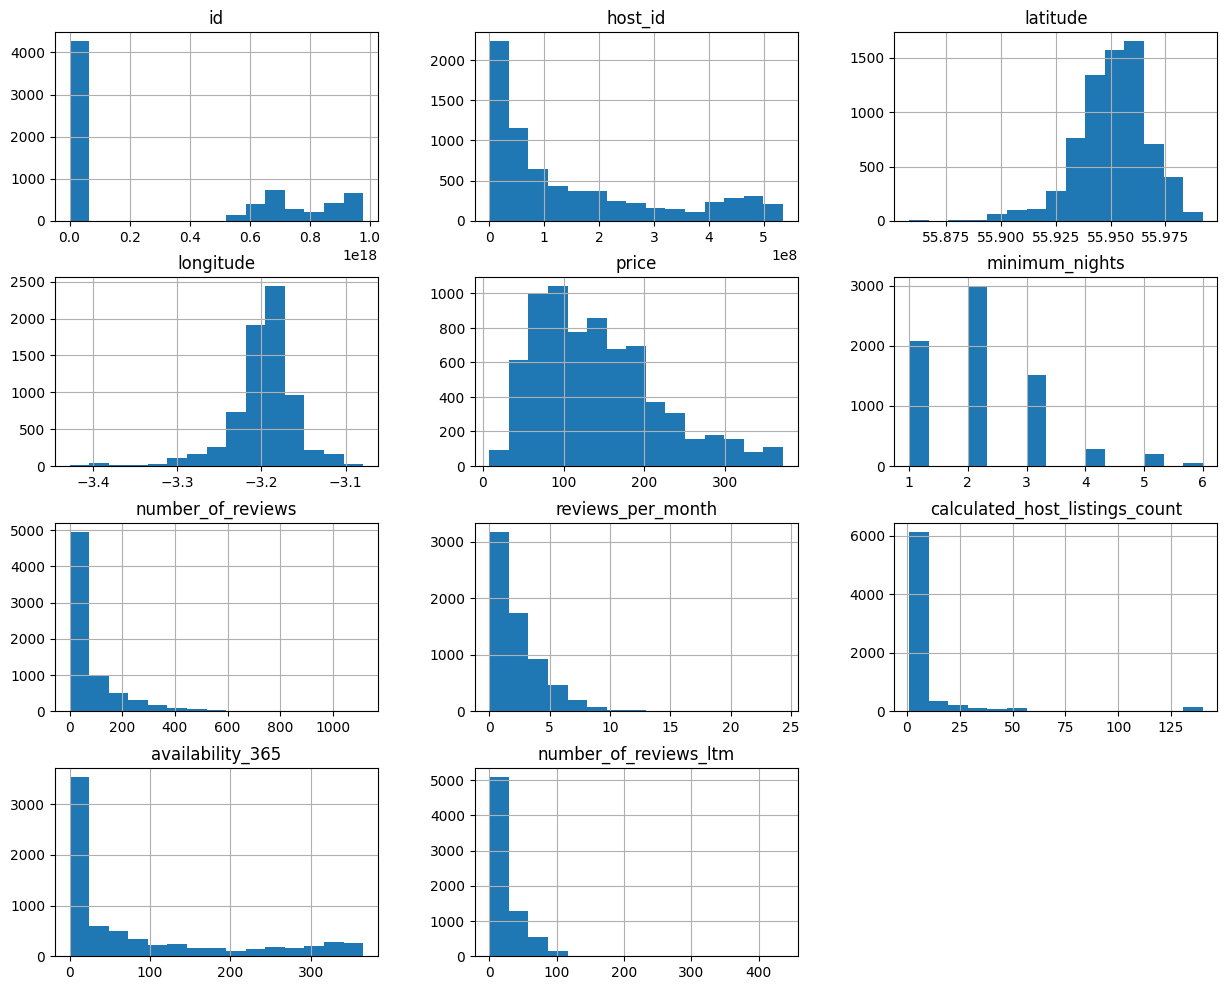

In [ ]:
# plotando o histograma
df_clean.hist(figsize=(15,12), bins=15);

# conferindo nosso shape
print(f'Número de variáveis: {df_clean.shape[1]}')
print(f'Número de entradas: {df_clean.shape[0]}')

### **Q4. Qual a média dos preços de aluguel?**

Agora que já limpamos nossos dados, vamos conferir novamente as informações estatísticas dessas duas colunas:

In [ ]:
df_clean[['price','minimum_nights']].describe().round(1)

,price,minimum_nights
count,7113.0,7113.0
mean,142.9,2.1
std,75.4,1.0
min,8.0,1.0
25%,83.0,1.0
50%,130.0,2.0
75%,188.0,3.0
max,372.0,6.0


Podemos ver que esses dados agora são muito mais condizentes. Vamos ver mais algumas análises.

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No contexto da nossa análise, estamos buscando relação ou semelhança entre duas variáveis.

Para tal, utilizaremos um método para verificarmos o coeficiente de correlação entre cada uma das varíaveis. Após isso, vamos plotar um mapa de calor para que a intensidade de cada correlação seja vista de uma forma mais prática.

In [ ]:
# criar uma matriz de correlação
df_clean_corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','number_of_reviews_ltm',
    'calculated_host_listings_count', 'availability_365']].corr(numeric_only=True).round(2)

# mostrar a matriz de correlação
df_clean_corr

,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count,availability_365
price,1.00,0.05,-0.06,-0.07,-0.05,0.19,0.18
minimum_nights,0.05,1.00,-0.02,-0.20,-0.10,-0.01,-0.08
number_of_reviews,-0.06,-0.02,1.00,0.42,0.70,-0.05,-0.03
reviews_per_month,-0.07,-0.20,0.42,1.00,0.62,-0.06,0.03
number_of_reviews_ltm,-0.05,-0.10,0.70,0.62,1.00,-0.03,0.03
calculated_host_listings_count,0.19,-0.01,-0.05,-0.06,-0.03,1.00,0.23
availability_365,0.18,-0.08,-0.03,0.03,0.03,0.23,1.00


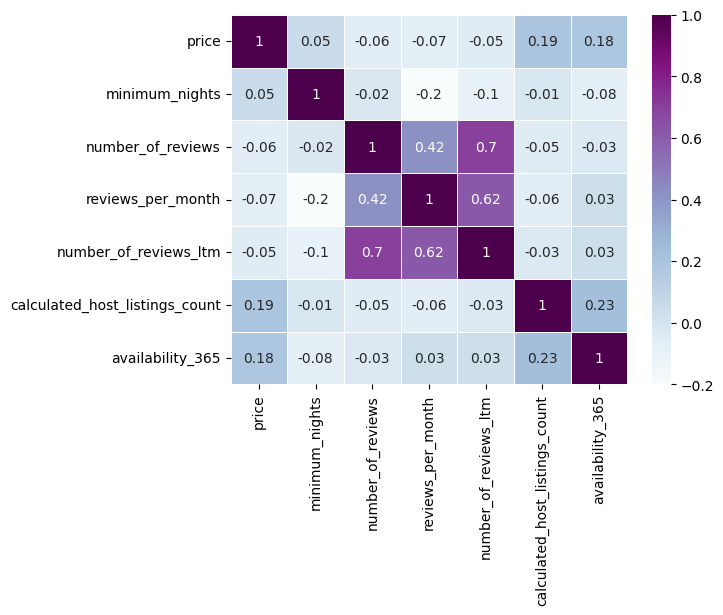

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(df_clean_corr, cmap='BuPu', annot=True, linewidth=.5);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Se você já utilizou o Airbnb sabe que possuem os mais diversos tipos de locações. Existem anúncios que vão desde iglus até castelos!

A coluna room type nos dá a informação de qual tipo de locação (casa/ apartamento inteiro, quarto, quarto compartilhado) está presente no anúncio. Podemos usar essa informação para verificar qual é o tipo de quarto mais comum na cidade que estamos analisando.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4779
Private room       2288
Hotel room           29
Shared room          17
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df.shape[0]

Entire home/apt    0.594107
Private room       0.284436
Hotel room         0.003605
Shared room        0.002113
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

Após realizar essa verificação, podemos utilizar um tipo de arquivo que também é disponibilizado no site para plotar um gráfico com a geometria da cidade que estamos analisando.

In [ ]:
# localidades com valores mais altos
df_clean[df_clean.price == df_clean.price.max()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3635,39103823,Rental unit in Edinburgh · ★4.57 · 3 bedrooms ...,273638847,John,"Old Town, Princes Street and Leith Street",55.95083,-3.188850,Entire home/apt,372,2,124,2023-09-04,2.73,1,59,54
3738,40426711,Rental unit in Edinburgh · ★4.79 · 1 bedroom ·...,309343416,Sonder (Edinburgh),New Town East and Gayfield,55.95680,-3.192750,Entire home/apt,372,2,80,2023-07-19,1.76,9,325,17
3806,41495625,Rental unit in Edinburgh · ★4.93 · 2 bedrooms ...,6200921,Eddie,"Old Town, Princes Street and Leith Street",55.94980,-3.188710,Entire home/apt,372,2,56,2023-09-06,1.30,20,43,35
5055,597182572598438070,Serviced apartment in Edinburgh · ★4.51 · 3 be...,102221550,Vincent,New Town East and Gayfield,55.95800,-3.190785,Entire home/apt,372,2,47,2023-06-23,2.72,14,0,29


In [ ]:
# média de valores por bairro
df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)

neighbourhood
Fairmilehead                                 199.800000
New Town West                                189.066667
Old Town, Princes Street and Leith Street    187.064655
New Town East and Gayfield                   176.366279
Deans Village                                171.917112
                                                ...    
Baberton and Juniper Green                    77.000000
Murrayburn and Wester Hailes North            74.615385
Liberton East                                 73.666667
The Calders                                   62.812500
Clovenstone and Wester Hailes                 53.142857
Name: price, Length: 111, dtype: float64

Fairmilehead é o bairro com a maior média do dataset. Vamos ver alguns anúncios desse bairro.

In [ ]:
df_clean[df_clean.neighbourhood == 'Fairmilehead']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1536,17933386,Rental unit in Edinburgh · ★4.98 · 3 bedrooms ...,49547438,Chris,Fairmilehead,55.89754,-3.204130,Entire home/apt,250,2,52,2020-01-05,0.67,1,0,0
2409,25876148,Townhouse in Edinburgh · ★4.71 · 3 bedrooms · ...,393363753,Baalaj,Fairmilehead,55.90253,-3.202230,Entire home/apt,221,1,7,2023-08-06,4.12,1,0,7
6704,813705669095256700,Home in Edinburgh · ★4.96 · 1 bedroom · 1 bed ...,104541158,Lauren,Fairmilehead,55.89793,-3.207400,Private room,49,1,49,2023-09-01,6.93,1,84,49
6793,836305361954862756,Home in Edinburgh · ★5.0 · 4 bedrooms · 3 beds...,2857178,Dingding,Fairmilehead,55.90229,-3.198060,Entire home/apt,194,3,3,2023-08-12,1.80,1,0,3
7552,929527854560503182,Home in Edinburgh · ★4.75 · 4 bedrooms · 5 bed...,213496545,Paula,Fairmilehead,55.90512,-3.205589,Entire home/apt,285,1,4,2023-09-08,4.00,1,169,4


Agora que já temos a média de preço por bairro, vamos ver o rosto do nosso arquivo que contém as geometrias das região.

In [ ]:
# primeiras entradas do nosso arquivo geojson
geo.head()

,neighbourhood,neighbourhood_group,geometry
0,Balerno and Bonnington Village,None,"MULTIPOLYGON (((-3.35804 55.91088, -3.35950 55..."
1,Currie West,None,"MULTIPOLYGON (((-3.30557 55.92039, -3.30418 55..."
2,Currie East,None,"MULTIPOLYGON (((-3.30808 55.89429, -3.30870 55..."
3,Baberton and Juniper Green,None,"MULTIPOLYGON (((-3.28635 55.91564, -3.28617 55..."
4,Bonaly and The Pentlands,None,"MULTIPOLYGON (((-3.30808 55.89429, -3.30834 55..."


Vamos ver a geometria do bairro de nossa primeira linha.

Bairro: Balerno and Bonnington Village


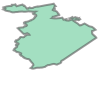

In [ ]:
print('Bairro: ' + geo.neighbourhood[0])
geo.geometry[0]

Podemos ver que a coluna 'neighbourhood' do nosso arquivo geojson possui os mesmos valores da coluna 'neighbourhood' do nosso dataframe df_clean. Assim, podemos utilizar isso para levar nossos valores ao nosso dataset 'geo'.

In [ ]:
# vamos levar as informações de preço para nosso arquivo dataframe 'geo' como um novo objeto
edinburgh = geo.merge(df_clean.groupby('neighbourhood').price.mean(), on='neighbourhood', how='left')

edinburgh.head()

,neighbourhood,neighbourhood_group,geometry,price
0,Balerno and Bonnington Village,None,"MULTIPOLYGON (((-3.35804 55.91088, -3.35950 55...",145.214286
1,Currie West,None,"MULTIPOLYGON (((-3.30557 55.92039, -3.30418 55...",98.545455
2,Currie East,None,"MULTIPOLYGON (((-3.30808 55.89429, -3.30870 55...",79.750000
3,Baberton and Juniper Green,None,"MULTIPOLYGON (((-3.28635 55.91564, -3.28617 55...",77.000000
4,Bonaly and The Pentlands,None,"MULTIPOLYGON (((-3.30808 55.89429, -3.30834 55...",128.840000


Vamos plotar um gráfico utilizando a biblioteca Geopandas para enxergar melhor esses bairros.

[]

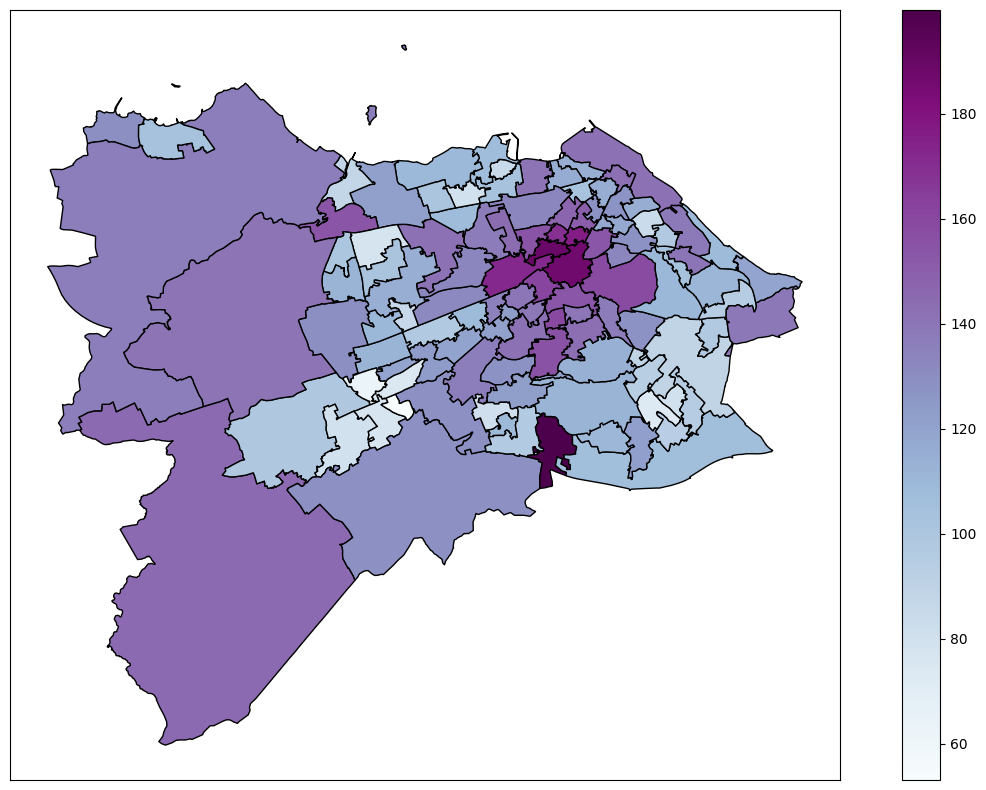

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))

edinburgh.plot(column='price',
            cmap='BuPu',
            figsize=(16,10),
            legend=True,
            edgecolor='Black',
            ax=ax,
            );

# Remover valores dos eixos x e y
ax.set_xticks([])
ax.set_yticks([])

Aqui podemos ver, por exemplo, que bairros entre o centro e as bordas da cidade costumam possuir um valor mais baixo que aqueles no centro ou nas fronteiras.



### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# média de mínimo de noites
df_clean.minimum_nights.mean()

2.1112048362153804

Vamos ver também a média de mínimos de noites por bairro.

In [ ]:
df_clean.groupby('neighbourhood').minimum_nights.mean().sort_values(ascending=False)

neighbourhood
Barnton, Cammo and Cramond South       3.142857
Joppa                                  2.666667
Leith (Hermitage and Prospect Bank)    2.595745
Granton South and Wardieburn           2.545455
Merchiston and Greenhill               2.482143
                                         ...   
Fairmilehead                           1.600000
Dalmeny, Kirkliston and Newbridge      1.473684
Parkhead and Sighthill                 1.444444
Corstorphine North                     1.333333
Clermiston and Drumbrae                1.333333
Name: minimum_nights, Length: 111, dtype: float64

Podemos ver que temos bairros com uma menor média de estadia, talvez ideais para apenas uma rápida visita à cidade.

## Conclusões


Esse projeto foi apenas uma rápida e superficial análise referente aos dados do Airbnb, mas pode ser muito útil para aqueles que procuram visitar a cidade de Edinburgh, por mais que os dados sejam de apenas algumas poucas locações e, por mais que o Airbnb seja uma empresa confiável e consolidada, nessa rápida análise pudemos enxergar que existem outliers em algumas variáveis.